In [1]:
#image size resize to 224*224
#https://iutbox.iut.ac.ir/index.php/s/yjXbPKFSXxLo54w
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
import matplotlib 
from sklearn.metrics import f1_score
import torch
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
# from torchvision.datasets as datasets
# from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import argparse
import torch
import time
import torch 
import torchvision
import os

# Suppose you are trying to load pre-trained resnet model in directory- models\resnet

os.environ['TORCH_HOME'] = 'models\\resnet' #setting the environment variable
res = torchvision.models.resnet18(pretrained=True)

INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10

TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")





C:\Users\Albaloo\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Albaloo\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:


# load the dataset
print("[INFO] loading  dataset...")


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

trainData = datasets.ImageFolder(root=r"E:\University\ComputatinalIntelligance\HomeWork\2\HW02-Practical\Dataset\train", transform=transform)

valData = datasets.ImageFolder(root=r"E:\University\ComputatinalIntelligance\HomeWork\2\HW02-Practical\Dataset\valid", transform=transform)
    
testData = datasets.ImageFolder(root=r"E:\University\ComputatinalIntelligance\HomeWork\2\HW02-Practical\Dataset\test", transform=transform)


[INFO] loading  dataset...


In [3]:


trainDataLoader = DataLoader(trainData, shuffle=True,
    batch_size=BATCH_SIZE)
valDataLoader = DataLoader(valData, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(testData, batch_size=BATCH_SIZE)

trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE






In [4]:
#fine tune
#class ResNet18(nn.Module):
#    def __init__(self, num_classes=5):
#        super(ResNet18, self).__init__()
#        self.resnet = res
#        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
 #       num_features = self.resnet.fc.in_features
#        self.fc1 = nn.Linear(num_features, 256)
#        self.relu = nn.ReLU(inplace=True)
 #       self.fc2 = nn.Linear(256, num_classes)
        
        
##    def forward(self, x):
#        x = self.resnet(x)
#        return x
    
    
 #feature extraction   
    
class ResNet18(nn.Module):
    def __init__(self,num_classes):
        super(ResNet18, self).__init__()
        
        self.resnet = res


        for param in res.parameters():
            param.requires_grad = False

        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 5)
        
    def forward(self, x):
        
        x = self.resnet(x)
        return x









In [5]:


# import wandb
# wandb.login()
# wandb.init()
# wandb.config.retries = 20  # Retry up to 10 times
# # Initialize wandb


# # Create a sweep configuration file
# sweep_config = {
#     'method': 'grid',
#     'parameters': {
#         'learning_rate': { 'value':[0.0005,0.001,0.0015]}
#     }
# }



In [6]:





# wandb.init()
# config = wandb.config
# config.learning_rate = 0.001
# sweep_id = wandb.sweep(sweep_config)

# initialize the LeNet model
print("[INFO] initializing the ResNet model...")

#grid search between these values
#param_grid = {

#    'lr': [0.0005,0.001,0.0015]
#}

  
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ResNet18(5).to(device)

lossFn = nn.CrossEntropyLoss()
optimizer = optim.SGD( model.parameters(),lr=INIT_LR, momentum=0.9)

    

H = {
     "train_loss": [],
     "train_acc": [],
     "val_loss": [],
     "val_acc": []
    }

    # measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()      

# agent = wandb.agent(sweep_id, function=train) 
# agent.train
        


 # loop over our epochs
for e in range(0, EPOCHS):
        print('epoch:' ,e+1)
        
        model.train()
        
        totalTrainLoss = 0
        totalValLoss = 0
     
        trainCorrect = 0
        valCorrect = 0
        # loop over the training set
        for (x, y) in trainDataLoader:
            # send the input to the device
            (x, y) = (x.to(device), y.to(device))

            pred = model(x)
            loss = lossFn(pred, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
           
            totalTrainLoss += loss
            trainCorrect += (pred.argmax(1) == y).type(
                torch.float).sum().item()
        
        with torch.no_grad():
            # set the model in evaluation mode
            model.eval()
            # loop over the validation set
            for (x, y) in valDataLoader:
                # send the input to the device
                (x, y) = (x.to(device), y.to(device))
                # make the predictions and calculate the validation loss
                pred = model(x)
                totalValLoss += lossFn(pred, y)
                # calculate the number of correct predictions
                valCorrect += (pred.argmax(1) == y).type(
                    torch.float).sum().item()
                avgTrainLoss = totalTrainLoss / trainSteps
        avgValLoss = totalValLoss / valSteps
        # calculate the training and validation accuracy
        trainCorrect = trainCorrect / len(trainDataLoader.dataset)
        valCorrect = valCorrect / len(valDataLoader.dataset)
        # update our training history
        H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
        H["train_acc"].append(trainCorrect)
        H["val_loss"].append(avgValLoss.cpu().detach().numpy())
        H["val_acc"].append(valCorrect)
        # print the model training and validation information
        print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
        print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(
            avgTrainLoss, trainCorrect))
        print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(
            avgValLoss, valCorrect))
        


[INFO] initializing the ResNet model...
[INFO] training the network...
epoch: 1
[INFO] EPOCH: 1/10
Train loss: 0.962539, Train accuracy: 0.6542
Val loss: 0.825224, Val accuracy: 0.7176

epoch: 2
[INFO] EPOCH: 2/10
Train loss: 0.650025, Train accuracy: 0.7784
Val loss: 0.710159, Val accuracy: 0.7480

epoch: 3
[INFO] EPOCH: 3/10
Train loss: 0.577216, Train accuracy: 0.8041
Val loss: 0.669677, Val accuracy: 0.7582

epoch: 4
[INFO] EPOCH: 4/10
Train loss: 0.542025, Train accuracy: 0.8119
Val loss: 0.646700, Val accuracy: 0.7684

epoch: 5
[INFO] EPOCH: 5/10
Train loss: 0.518181, Train accuracy: 0.8192
Val loss: 0.627264, Val accuracy: 0.7752

epoch: 6
[INFO] EPOCH: 6/10
Train loss: 0.502065, Train accuracy: 0.8239
Val loss: 0.622327, Val accuracy: 0.7776

epoch: 7
[INFO] EPOCH: 7/10
Train loss: 0.485868, Train accuracy: 0.8307
Val loss: 0.612120, Val accuracy: 0.7854

epoch: 8
[INFO] EPOCH: 8/10
Train loss: 0.476895, Train accuracy: 0.8320
Val loss: 0.618585, Val accuracy: 0.7792

epoch: 9


In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testDataLoader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))



import csv

predictions = []

# Evaluate the model on the test dataset
with torch.no_grad():
    for data in testDataLoader:
        images, labels = data[0].to(device), data[1].to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the predicted labels to the list
        predictions.extend(predicted.cpu().numpy().tolist())

# Write the predicted labels to a CSV file
with open('predictions_resnet_freez.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['ImageId', 'Label'])
    for i, label in enumerate(predictions):
        writer.writerow([i+1, label])




from sklearn.metrics import f1_score
with torch.no_grad():
    true_labels = []
    predicted_labels = []

    for data in testDataLoader:
        images, labels = data[0].to(device), data[1].to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()

    f1 = f1_score(true_labels, predicted_labels,average='weighted')

print('F1 score of the network on test images:', f1)



Accuracy of the network on the 10000 test images: 77 %
F1 score of the network on test images: 0.7751233840620517


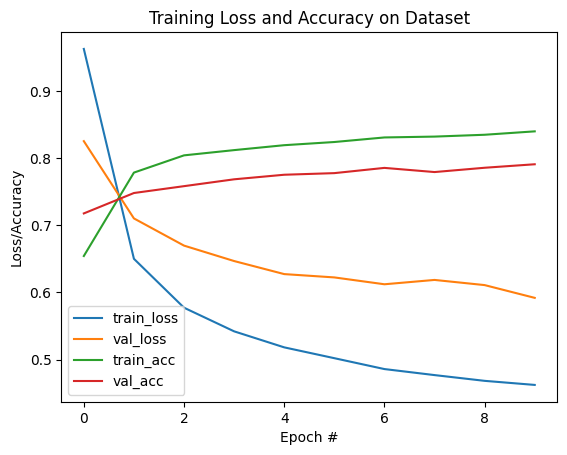

In [8]:
# plot the training loss and accuracy
# plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

plt.show()